# Neural Networks and Deep Learning for Life Sciences and Health Applications - An introductory course about theoretical fundamentals, case studies and implementations in python and tensorflow

(C) Umberto Michelucci 2018 - umberto.michelucci@gmail.com 

github repository: https://github.com/michelucci/zhaw-dlcourse-spring2019

Spring Semester 2019

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf

from sklearn import linear_model

from sklearn import datasets, svm

In [5]:
def make_mesh_predict(h, c1, clf):
    """
    Inputs:
    h -> mesh step (0.001 is a good value of you move between 0 and 1)
    c -> Your training data
    clf -> Your classifier
    
    Outputs:
    xx -> x values of the mesh
    yy -> y values of the mesh
    Z -> The prediction (the color of each point)
    """
    
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = c1[:, 0].min() - .2, c1[:, 0].max() + .2
    y_min, y_max = c1[:, 1].min() - .2, c1[:, 1].max() + .2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    return xx, yy, Z

In [8]:
hh = 0.001
x_min, x_max = c[:, 0].min() - .2, c[:, 0].max() + .2
y_min, y_max = c[:, 1].min() - .2, c[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, hh), np.arange(y_min, y_max, hh))
np.c_[xx.ravel(), yy.ravel()].shape

(1068228, 2)

In [20]:
def make_mesh_predict_tf(h, c1, pred):
    """
    Inputs:
    h -> mesh step (0.001 is a good value of you move between 0 and 1)
    c -> Your training data
    clf -> Your classifier
    
    Outputs:
    xx -> x values of the mesh
    yy -> y values of the mesh
    Z -> The prediction (the color of each point)
    """
    
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = c1[:, 0].min() - .2, c1[:, 0].max() + .2
    y_min, y_max = c1[:, 1].min() - .2, c1[:, 1].max() + .2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    zpred = sess.run(pred, feed_dict={X:np.c_[xx.ravel(), yy.ravel()].T, Y: train_y, learning_rate: 0.005})
    
    Z = zpred.reshape(xx.shape)
    
    return xx, yy, Z

In [70]:
def print_decision_boundary(xx, yy, Z, X, Y):
    """
    Inputs:
    xx: the values for the mesh (coming from make_mesh_predict())
    yy: the values for the mesh (coming from make_mesh_predict())
    Z: the prediction for each point (that will be mapped to the color)
    X,Y: the training points
    """
    fig = plt.figure(1, figsize=(9, 7))
    plt.pcolormesh(xx, yy, Z, cmap='Greys', alpha = 0.1)  # plt.cm.Paired

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y*100, edgecolors='k',  s= 40, cmap = 'gray')  # cmap=plt.cm.Paired
    plt.xlabel('$x$')
    plt.ylabel('$y$')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()
    
    fig.savefig('Figure_5-X'+'.png', format='png', dpi=300,bbox_inches='tight')

In [7]:
nobs = 30

np.random.seed(42)

xx1 = np.array([np.random.normal(0.3,0.15) for i in range (0,nobs)])
yy1 = np.array([np.random.normal(0.3,0.15) for i in range (0,nobs)])
xx2 = np.array([np.random.normal(0.1,0.1) for i in range (0,nobs)])
yy2 = np.array([np.random.normal(0.3,0.1) for i in range (0,nobs)])

c1_ = np.c_[xx1.ravel(), yy1.ravel()]
c2_ = np.c_[xx2.ravel(), yy2.ravel()] 

c = np.concatenate([c1_,c2_])

# Now let's create the labels

yy1_ = np.full(nobs, 0, dtype=int)
yy2_ = np.full(nobs, 1, dtype=int)
yyL = np.concatenate((yy1_, yy2_), axis = 0)

In [9]:
train_x = c.T
train_y = yyL.reshape(1,60)

In [10]:
print(train_x.shape)
print(train_y.shape)

(2, 60)
(1, 60)


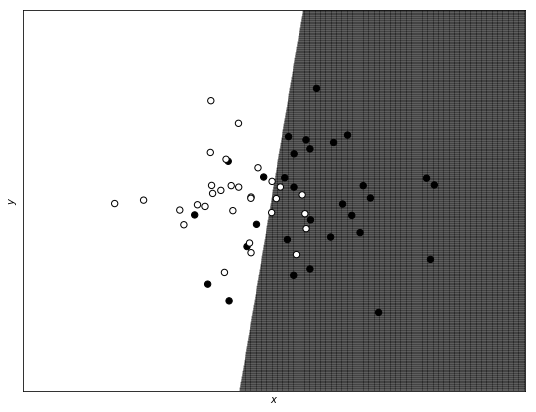

In [83]:
logreg2 = linear_model.LogisticRegression(C=1e5)
logreg2.fit(c, yyL*(-1))

xx, yy, Z = make_mesh_predict(0.001, c, logreg2)
xx1, yy1, Z1 = make_mesh_predict(0.001, c, logreg2)

print_decision_boundary(xx, yy, Z, c, yyL)

#plt.savefig('Figure_5-X'+'.png', format='png', dpi=300,bbox_inches='tight')

In [65]:
logreg2.get_params()

{'C': 100000.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [14]:
def create_layer (X, n, activation):
    ndim = int(X.shape[0])
    stddev = 2.0 / np.sqrt(ndim)
    initialization = tf.truncated_normal((n, ndim), stddev = stddev)
    W = tf.Variable(initialization)
    b = tf.Variable(tf.zeros([n,1]))
    Z = tf.matmul(W,X)+b
    return activation(Z), W, b

In [219]:
tf.reset_default_graph()

n_dim = 2
n1 = 20
n2 = 20
n3 = 20
n4 = 20
n_outputs = 1


tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [1, None])

learning_rate = tf.placeholder(tf.float32, shape=())
lambd = tf.placeholder(tf.float32, shape=())

hidden1, W1, b1 = create_layer (X, n1, activation = tf.nn.relu)
hidden2, W2, b2 = create_layer (hidden1, n2, activation = tf.nn.relu)
hidden3, W3, b3 = create_layer (hidden2, n3, activation = tf.nn.relu)
hidden4, W4, b4 = create_layer (hidden3, n4, activation = tf.nn.relu)
y_, W5, b5 = create_layer (hidden4, n_outputs, activation = tf.sigmoid)
#y_ = tf.nn.softmax(outputs)

#cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

reg = tf.nn.l2_loss(W1) + tf.nn.l2_loss(W2) + tf.nn.l2_loss(W3) + \
          tf.nn.l2_loss(W4) + tf.nn.l2_loss(W5)

#cost_mse = tf.reduce_mean(tf.square(y_-Y))
#y_ = tf.sigmoid(tf.matmul(W,X)+b)
cost_class = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))

cost = tf.reduce_mean(cost_class + lambd*reg)

# Adam
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8).minimize(cost)

In [200]:
def model(training_epochs, features, target, logging_step = 100, learning_r = 0.001, lambd_val = 0.1):
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        
        sess.run(optimizer, feed_dict = {X: features, Y: target, learning_rate: learning_r, lambd: lambd_val})
        cost_ = sess.run(cost_class, feed_dict={ X:features, Y: target, learning_rate: learning_r, lambd: lambd_val})
        cost_history = np.append(cost_history, cost_)

        if (epoch % logging_step == 0):
                #pred_y_test = sess.run(y_, feed_dict = {X: dev_x, Y: dev_y})
                print("Reached epoch",epoch,"cost J =", cost_)
                #print("Training MSE = ", cost_)
                #print("Dev MSE      = ", sess.run(cost_mse, feed_dict = {X: dev_x, Y: dev_y}))
                
    return sess, cost_history

In [204]:
sess, cost_history = model(learning_r = 0.005, 
                                training_epochs = 100, 
                                features = train_x, 
                                target = train_y,
                                logging_step = 10,
                                lambd_val = 0.0)

Reached epoch 0 cost J = 0.865109
Reached epoch 10 cost J = 0.576385
Reached epoch 20 cost J = 0.522898
Reached epoch 30 cost J = 0.496909
Reached epoch 40 cost J = 0.476326
Reached epoch 50 cost J = 0.457063
Reached epoch 60 cost J = 0.439215
Reached epoch 70 cost J = 0.411078
Reached epoch 80 cost J = 0.376612
Reached epoch 90 cost J = 0.344795
Reached epoch 100 cost J = 0.315639


In [205]:
correct_prediction1=tf.equal(tf.greater(y_, 0.5), tf.equal(Y,1))
accuracy1 = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))

print(sess.run(accuracy1, feed_dict={X:train_x, Y: train_y, learning_rate: 0.005}))

0.833333


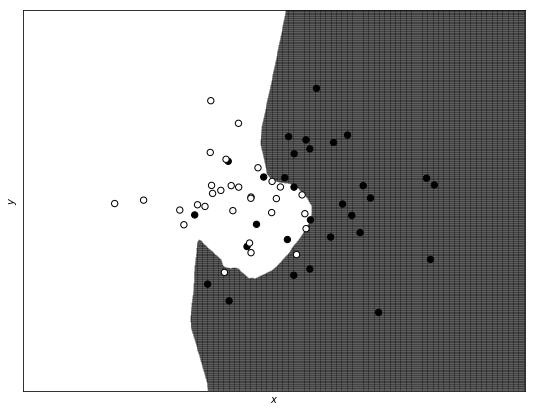

In [79]:
pred = tf.less(y_, 0.5)
zpred = sess.run(pred, feed_dict={X:train_x, Y: train_y, learning_rate: 0.005})

xx, yy, Z = make_mesh_predict_tf(0.001, c, pred)
xx1, yy1, Z1 = make_mesh_predict_tf(0.001, c, pred)

print_decision_boundary(xx, yy, Z, c, yyL)

In [209]:
sess, cost_history = model(learning_r = 1e-3, 
                                training_epochs = 1000, 
                                features = train_x, 
                                target = train_y,
                                logging_step = 100,
                                lambd_val = 0.1)

Reached epoch 0 cost J = 0.929856
Reached epoch 100 cost J = 0.574355
Reached epoch 200 cost J = 0.5333
Reached epoch 300 cost J = 0.514089
Reached epoch 400 cost J = 0.505754
Reached epoch 500 cost J = 0.504944
Reached epoch 600 cost J = 0.505092
Reached epoch 700 cost J = 0.503848
Reached epoch 800 cost J = 0.504995
Reached epoch 900 cost J = 0.506008
Reached epoch 1000 cost J = 0.507309


In [210]:
weights1 = sess.run(W1,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 0.1})
weights2 = sess.run(W2,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 0.1})
weights3 = sess.run(W3,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 0.1})
weights4 = sess.run(W4,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 0.1})
weights5 = sess.run(W5,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 0.1})

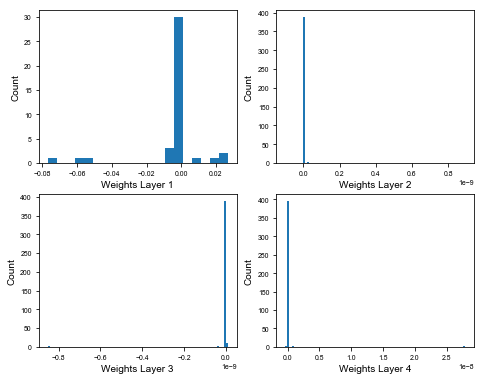

In [144]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(7.8, 6.2))
ax = fig.add_subplot(2, 2, 1)
plt.hist(weights1.flatten(), bins = 20)
ax.set_xlabel('Weights Layer 1')
ax.set_ylabel('Count')

#ax.set_xlim(0,0.4)

ax = fig.add_subplot(2, 2, 2)
plt.hist(weights2.flatten(), bins = 100)
ax.set_xlabel('Weights Layer 2')
ax.set_ylabel('Count')
#ax.set_xlim(0,0.4)

ax = fig.add_subplot(2, 2, 3)
plt.hist(weights3.flatten(), bins = 100)
ax.set_xlabel('Weights Layer 3')
ax.set_ylabel('Count')
#ax.set_xlim(0,0.4)

ax = fig.add_subplot(2, 2, 4)
plt.hist(weights4.flatten(), bins = 100)
ax.set_xlabel('Weights Layer 4')
ax.set_ylabel('Count')
#ax.set_xlim(0,0.4)

#plt.title ('Weights Distribution')

fig.savefig('Figure_5-X'+'.png', format='png', dpi=300,bbox_inches='tight')

# Weights going to zero with L2

In [220]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

cost_history = []
weight_history = []
for epoch in range(1000+1):
        
    sess.run(optimizer, feed_dict = {X: train_x, Y: train_y, learning_rate: 1e-3, lambd: 0.1})
    cost_ = sess.run(cost_class, feed_dict={ X:train_x, Y: train_y, learning_rate: 1e-3, lambd: 0.1})
    weights3 = sess.run(W3,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 0.1})
    cost_history = np.append(cost_history, cost_)
    weight_history = np.append(weight_history, weights3[12,5])

    if (epoch % 100 == 0):
        print("Reached epoch",epoch,"cost J =", cost_)
        print("w_12,5 =", weights3[12,5])
                


Reached epoch 0 cost J = 0.931172
w_12,5 = 0.108121
Reached epoch 100 cost J = 0.604734
w_12,5 = 0.0286741
Reached epoch 200 cost J = 0.578327
w_12,5 = 0.00313217
Reached epoch 300 cost J = 0.579266
w_12,5 = 0.000109055
Reached epoch 400 cost J = 0.587921
w_12,5 = 4.77887e-07
Reached epoch 500 cost J = 0.602471
w_12,5 = -3.08213e-09
Reached epoch 600 cost J = 0.618846
w_12,5 = 1.13238e-11
Reached epoch 700 cost J = 0.631048
w_12,5 = 2.2882e-14
Reached epoch 800 cost J = 0.647523
w_12,5 = -4.50089e-16
Reached epoch 900 cost J = 0.665124
w_12,5 = -1.23481e-18
Reached epoch 1000 cost J = 0.682517
w_12,5 = 2.38382e-21


## Figure 5-9

In [238]:
weight_history

array([  1.08121291e-01,   1.07121564e-01,   1.06122255e-01, ...,
         4.14699407e-21,   3.22907199e-21,   2.38381921e-21])

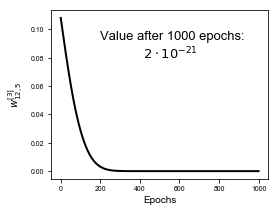

In [254]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(3.9, 3.1))
ax = fig.add_subplot(1, 1, 1)
ax.plot(weight_history, lw = 2.0, ls = '-', color = 'black', label = 'MSE Train')
#ax.plot(0.11*np.exp(-np.arange(0,1000,1)/70), lw = 2.0, ls = '-', color = 'red', label = 'MSE Train')
ax.set_xlabel(r'Epochs')
ax.set_ylabel('$w^{[3]}_{12,5}$')
#ax.set_ylim(10e-15,25)
#ax.set_xlim(0,10)
ax.text(200, 0.08, 'Value after 1000 epochs:\n            $2\cdot 10^{-21}$', fontsize = 13)
#ax.text(12.5, 10, 'More\nregularization', fontsize = 13)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


fig.savefig('Figure_5-9'+'.png', format='png', dpi=300,bbox_inches='tight')

## Is the weight decay expontential?

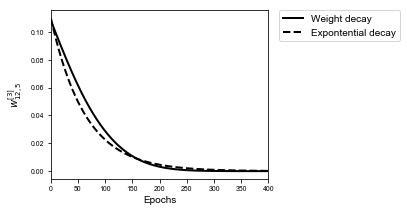

In [266]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(3.9, 3.1))
ax = fig.add_subplot(1, 1, 1)
ax.plot(weight_history, lw = 2.0, ls = '-', color = 'black', label = 'Weight decay')
ax.plot(0.11*np.exp(-np.arange(0,1000,1)/63), lw = 2.0, ls = '--', color = 'black', label = 'Expontential decay')
ax.set_xlabel(r'Epochs')
ax.set_ylabel('$w^{[3]}_{12,5}$')
#ax.set_ylim(10e-15,25)
ax.set_xlim(0,400)
#ax.text(200, 0.08, 'Value after 1000 epochs:\n            $2\cdot 10^{-21}$', fontsize = 13)
#ax.text(12.5, 10, 'More\nregularization', fontsize = 13)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig.savefig('Figure_5-10'+'.png', format='png', dpi=300,bbox_inches='tight')

# How many weights are zero?

In [197]:
np.min(np.abs(weights5))

1.3000234e-05

In [211]:
print((np.sum(np.abs(weights1)< 1e-20))/weights1.size*100.0)
print((np.sum(np.abs(weights2)< 1e-20))/weights2.size*100.0)
print((np.sum(np.abs(weights3)< 1e-20))/weights3.size*100.0)
print((np.sum(np.abs(weights4)< 1e-20))/weights4.size*100.0)
print((np.sum(np.abs(weights5)< 1e-20))/weights5.size*100.0)

0.0
9.5
11.25
12.75
0.0


In [123]:
def eval_weights_stats(W):
    w_zero_count = np.sum(W < 1e-2)
    return w_zero_count 

In [124]:
(eval_weights_stats(weights1)+\
eval_weights_stats(weights2)+\
eval_weights_stats(weights3)+\
eval_weights_stats(weights4)+\
eval_weights_stats(weights5))/(weights1.size + weights2.size + weights3.size + weights4.size + weights5.size)

0.67142857142857137

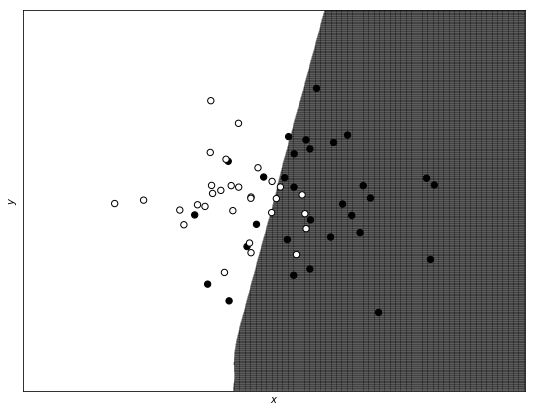

In [111]:
pred = tf.less(y_, 0.5)
zpred = sess.run(pred, feed_dict={X:train_x, Y: train_y, learning_rate: 0.005})

xx, yy, Z = make_mesh_predict_tf(0.001, c, pred)

print_decision_boundary(xx, yy, Z, c, yyL)

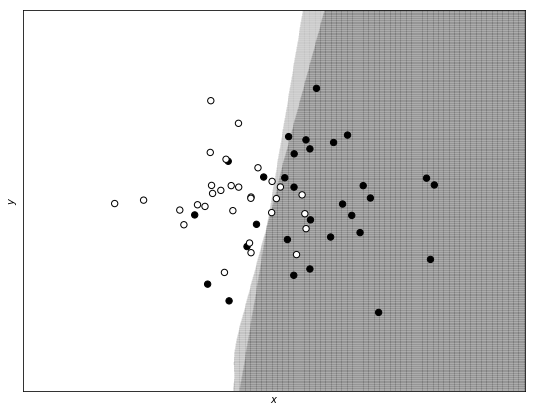

In [112]:
fig = plt.figure(1, figsize=(9, 7))
plt.pcolormesh(xx1, yy1, Z1, cmap='Greys', alpha = 0.02)  # plt.cm.Paired
plt.pcolormesh(xx, yy, Z, cmap='Greys', alpha = 0.02)  # plt.cm.Paired

    # Plot also the training points
plt.scatter(c[:, 0], c[:, 1], c=yyL*100, edgecolors='k',  s= 40, cmap = 'gray')  # cmap=plt.cm.Paired
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()
fig.savefig('Figure_5-X'+'.png', format='png', dpi=300,bbox_inches='tight')

# L1 Regularization

In [170]:
tf.reset_default_graph()

n_dim = 2
n1 = 20
n2 = 20
n3 = 20
n4 = 20
n_outputs = 1


tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [1, None])

learning_rate = tf.placeholder(tf.float32, shape=())
lambd = tf.placeholder(tf.float32, shape=())

hidden1, W1, b1 = create_layer (X, n1, activation = tf.nn.relu)
hidden2, W2, b2 = create_layer (hidden1, n2, activation = tf.nn.relu)
hidden3, W3, b3 = create_layer (hidden2, n3, activation = tf.nn.relu)
hidden4, W4, b4 = create_layer (hidden3, n4, activation = tf.nn.relu)
y_, W5, b5 = create_layer (hidden4, n_outputs, activation = tf.sigmoid)
#y_ = tf.nn.softmax(outputs)

#cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

reg = tf.reduce_sum(tf.abs(W1))+tf.reduce_sum(tf.abs(W2))+tf.reduce_sum(tf.abs(W3))+\
        tf.reduce_sum(tf.abs(W4))+tf.reduce_sum(tf.abs(W5))

#cost_mse = tf.reduce_mean(tf.square(y_-Y))
#y_ = tf.sigmoid(tf.matmul(W,X)+b)
cost_class = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))

cost = tf.reduce_mean(cost_class + lambd*reg)

# Adam
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8).minimize(cost)

In [171]:
def model(training_epochs, features, target, logging_step = 100, learning_r = 0.001, lambd_val = 0.1):
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        
        sess.run(optimizer, feed_dict = {X: features, Y: target, learning_rate: learning_r, lambd: lambd_val})
        cost_ = sess.run(cost_class, feed_dict={ X:features, Y: target, learning_rate: learning_r, lambd: lambd_val})
        cost_history = np.append(cost_history, cost_)

        if (epoch % logging_step == 0):
                #pred_y_test = sess.run(y_, feed_dict = {X: dev_x, Y: dev_y})
                print("Reached epoch",epoch,"cost J =", cost_)
                #print("Training MSE = ", cost_)
                #print("Dev MSE      = ", sess.run(cost_mse, feed_dict = {X: dev_x, Y: dev_y}))
                
    return sess, cost_history

In [190]:
sess, cost_history = model(learning_r = 1e-3, 
                                training_epochs = 5000, 
                                features = train_x/10.0, 
                                target = train_y,
                                logging_step = 1000,
                                lambd_val = 1.0)

Reached epoch 0 cost J = 0.6932
Reached epoch 1000 cost J = 0.693147
Reached epoch 2000 cost J = 0.693147
Reached epoch 3000 cost J = 0.693147
Reached epoch 4000 cost J = 0.693147
Reached epoch 5000 cost J = 0.693147


In [191]:
correct_prediction1=tf.equal(tf.greater(y_, 0.5), tf.equal(Y,1))
accuracy1 = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))

print(sess.run(accuracy1, feed_dict={X:train_x/10.0, Y: train_y, learning_rate: 1e-3}))

0.5


In [192]:
weights1_ = sess.run(W1,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 0.1})
weights2_ = sess.run(W2,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 0.1})
weights3_ = sess.run(W3,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 0.1})
weights4_ = sess.run(W4,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 0.1})
weights5_ = sess.run(W5,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 0.1})

In [193]:
np.min(np.abs(weights5))

0.00012859399

In [194]:
print((np.sum(np.abs(weights1_)<1e-15))/weights1_.size*100.0)
print((np.sum(np.abs(weights2_)<1e-15))/weights2_.size*100.0)
print((np.sum(np.abs(weights3_)<1e-5))/weights3_.size*100.0)
print((np.sum(np.abs(weights4_)< 1e-5))/weights4_.size*100.0)
print((np.sum(np.abs(weights5_)< 1e-5))/weights5_.size*100.0)

0.0
0.0
10.0
5.0
5.0
